In [226]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer


***Section A – Data Understanding & Cleaning (Pandas)***


In [227]:
a = pd.read_csv("/content/laptopData - laptopData.csv")
a

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,65.4,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [228]:
a.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [229]:
a.shape

(1303, 12)

In [230]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1253 non-null   object 
 3   Inches            1220 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1259 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1259 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [231]:
a.describe()

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


In [232]:
a.isnull().sum()

,0
Unnamed: 0,30
Company,30
TypeName,50
Inches,83
ScreenResolution,30
Cpu,30
Ram,44
Memory,30
Gpu,30
OpSys,30


In [233]:
a['Ram']=a['Ram'].replace('8GB',8)
a['Ram']=a['Ram'].replace('16GB',16)
a['Ram']=a['Ram'].replace('4GB',4)
a['Ram']=a['Ram'].replace('2GB',2)
a['Ram']=a['Ram'].replace('6GB',6)
a['OpSys']= a['OpSys'].replace('Windows 10','Win 10')
a

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Win 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Win 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,65.4,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Win 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Win 10,2.19kg,40705.9200


In [234]:
a['Inches'] = pd.to_numeric(a['Inches'], errors='coerce')
a['Inches'].fillna(a['Inches'].mean(), inplace=True)

/tmp/ipython-input-2260509009.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  a['Inches'].fillna(a['Inches'].mean(), inplace=True)


In [235]:
a['Ram'] = pd.to_numeric(a['Ram'], errors='coerce')
a['Ram'].fillna(a['Ram'].mean(), inplace=True)

/tmp/ipython-input-3972778087.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  a['Ram'].fillna(a['Ram'].mean(), inplace=True)


In [236]:
a['Weight'] = a['Weight'].astype(str).str.replace('kg', '', regex=False)
a['Weight'] = pd.to_numeric(a['Weight'], errors='coerce')
a['Weight'].fillna(a['Weight'].mean(), inplace=True)

/tmp/ipython-input-2344995909.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  a['Weight'].fillna(a['Weight'].mean(), inplace=True)


In [237]:
a['Company'].fillna(a['Company'].mode()[0], inplace=True)
a['TypeName'].fillna(a['TypeName'].mode()[0], inplace=True)
a['ScreenResolution'].fillna(a['ScreenResolution'].mode()[0], inplace=True)
a['Cpu'].fillna(a['Cpu'].mode()[0], inplace=True)
a['Memory'].fillna(a['Memory'].mode()[0], inplace=True)
a['Gpu'].fillna(a['Gpu'].mode()[0], inplace=True)
a['OpSys'].fillna(a['OpSys'].mode()[0], inplace=True)
a['Price'].fillna(a['Price'].mean(), inplace=True)


/tmp/ipython-input-2884004030.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  a['Company'].fillna(a['Company'].mode()[0], inplace=True)
/tmp/ipython-input-2884004030.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [238]:
a

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Win 10,1.80,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16.0,512GB SSD,Intel HD Graphics 520,Win 10,1.30,79866.7200
1300,1300.0,Lenovo,Notebook,65.4,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Win 10,1.50,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Win 10,2.19,40705.9200


Standardize the values in the column OpSys (e.g., unify "Windows 10" and "Win
10").
Extract the numeric value from the column Ram (e.g., convert "8GB" → 8).

Split the column Memory into HDD and SSD capacity (Hint: use str.split).

In [239]:
a[["Capacity_1", "Capacity_2"]] = a["Memory"].astype(str).str.split(" ", n=1, expand=True)

a

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Capacity_1,Capacity_2
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128GB,SSD
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,128GB,Flash Storage
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,256GB,SSD
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,512GB,SSD
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,256GB,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Win 10,1.80,33992.6400,128GB,SSD
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16.0,512GB SSD,Intel HD Graphics 520,Win 10,1.30,79866.7200,512GB,SSD
1300,1300.0,Lenovo,Notebook,65.4,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Win 10,1.50,12201.1200,64GB,Flash Storage
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Win 10,2.19,40705.9200,1TB,HDD


***Section B – Exploratory Data Analysis (EDA)***

**Univariate Analysis**

Plot a histogram of Price. Write your inference.


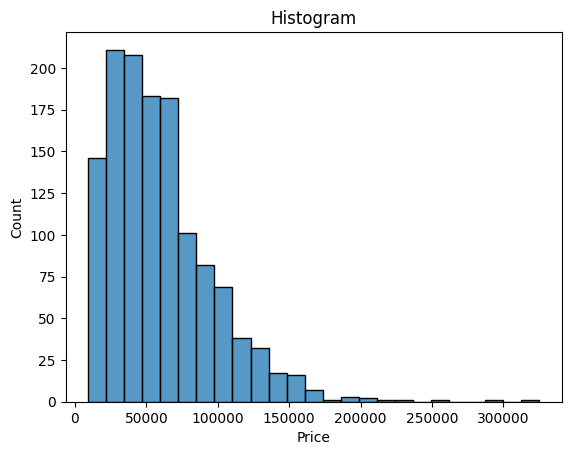

In [240]:
sns.histplot(a['Price'],bins = 25)
plt.title("Histogram")
plt.show()

the huge number of laptops are in price range of 30000 to 70000.

Plot a countplot of Company. Which laptop brand has the highest representation in
the dataset?

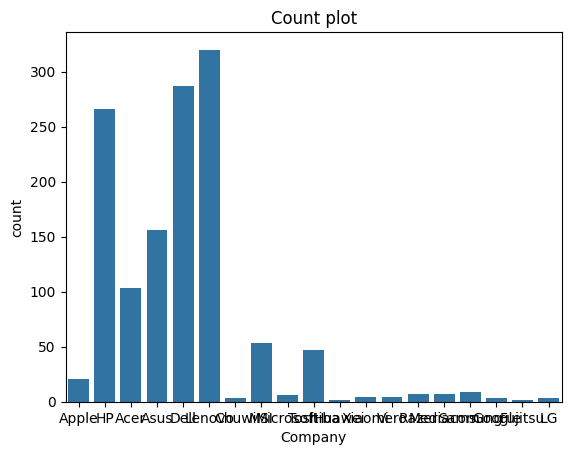

In [241]:
sns.countplot(x = 'Company', data = a)
plt.title('Count plot')
plt.show()

lenova brand has a highest representation in the data

 Plot a boxplot of Inches. What can you say about laptop screen size distribution?

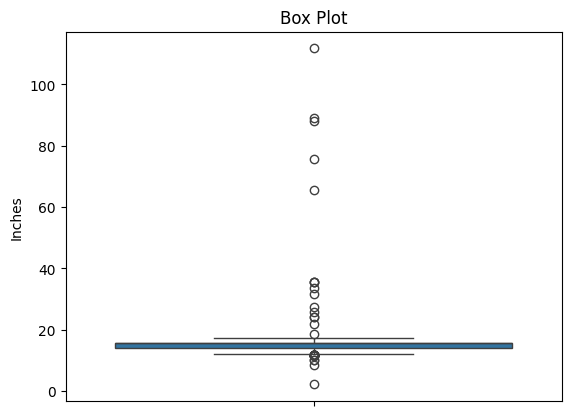

In [242]:
sns.boxplot(y ='Inches', data = a)
plt.title('Box Plot')
plt.show()

the vast screen size are in around 15 inches

**Bivariate Analysis**


 Create a scatter plot of Ram vs Price. Do laptops with more RAM cost more?


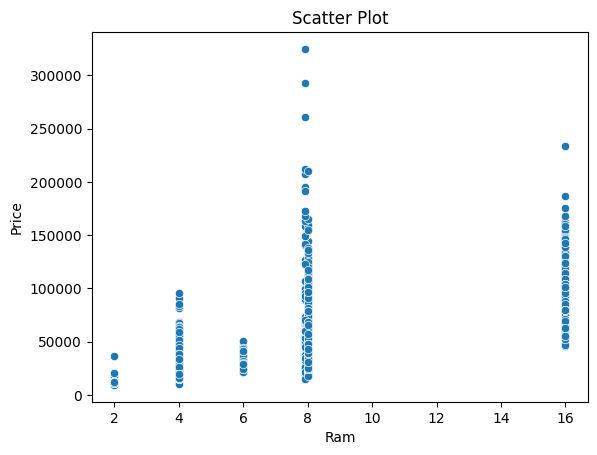

In [243]:
sns.scatterplot(x='Ram',y='Price',data =a)
plt.title('Scatter Plot')
plt.show()

Literally not, the 8 gb storage has the highest amount than 16gb

Plot a boxplot of Company vs Price. Which company has the most expensive median
price?


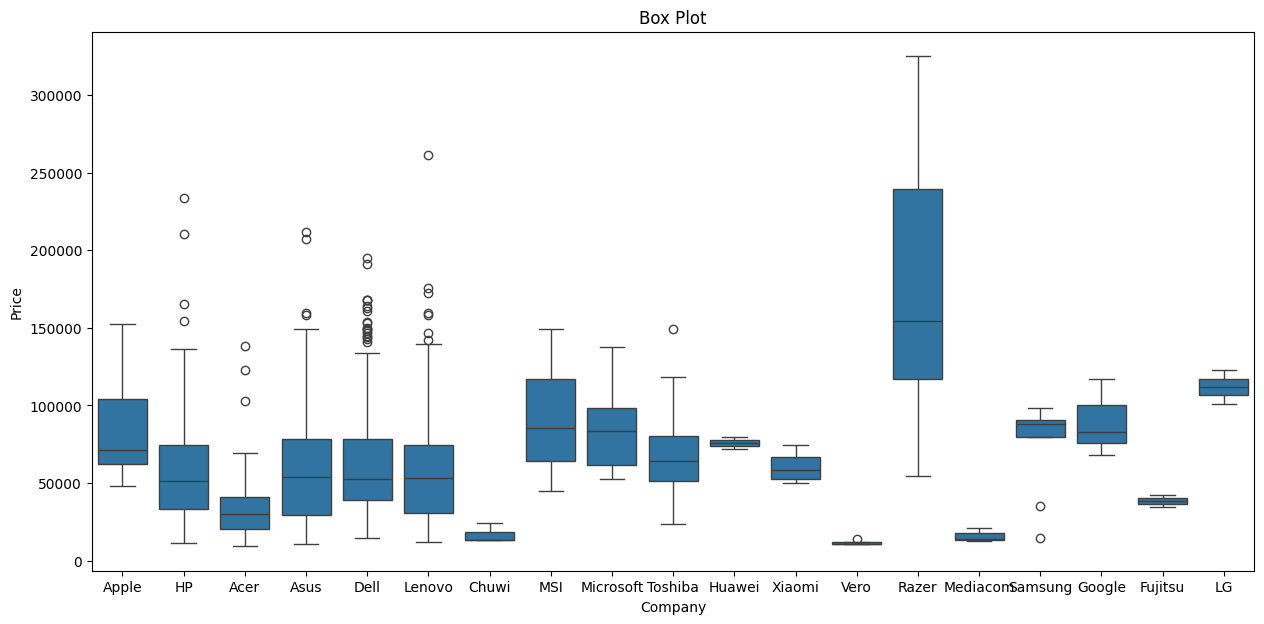

In [244]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Company',y='Price',data =a)
plt.title('Box Plot')
plt.show()

Razer company has the most expensive median price.

 Plot a correlation heatmap of numerical variables (Inches, Ram, Weight, Price).
Which variable has the strongest correlation with Price?


In [245]:
col =['Inches','Weight','Price']
selected_column=a[col]
correlate_matrix=selected_column.corr()
correlate_matrix

,Inches,Weight,Price
Inches,1.000000,0.157034,0.022580
Weight,0.157034,1.000000,0.087849
Price,0.022580,0.087849,1.000000


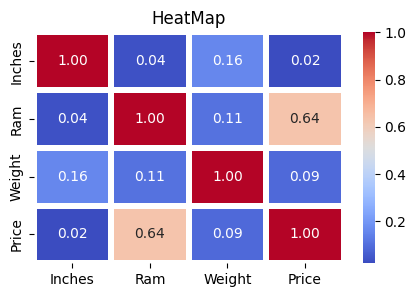

In [246]:
col =['Inches','Ram','Weight','Price']
selected_column=a[col]
correlate_matrix=selected_column.corr()
plt.figure(figsize=(5,3))
sns.heatmap(correlate_matrix,annot=True,cmap="coolwarm",linewidths=3,fmt='.2f')
plt.title("HeatMap")
plt.show()

Price are strongly correlated with Weight.

**Multivariate Analysis**

Group the dataset by Company and OpSys and find the average price for each
group. Write your observations.


In [247]:
a.groupby(['Company', 'OpSys'])['Price'].mean()

Company    OpSys       
Acer       Chrome OS        16541.018182
           Linux            27970.668000
           Win 10           36975.836274
Apple      Mac OS X         67285.780200
           macOS            93220.327385
Asus       Chrome OS        37578.384000
           Linux            25835.312160
           No OS            48418.200000
           Win 10           62788.341022
           Windows 10 S     16463.253600
Chuwi      Win 10           16745.726400
Dell       Chrome OS        15717.600000
           Linux            37205.728457
           Win 10           67233.612748
           Windows 7        60873.846171
Fujitsu    Win 10           38574.720000
Google     Chrome OS        89386.080000
HP         Chrome OS        28105.200000
           No OS            20322.299782
           Win 10           55261.036863
           Windows 7        99284.361183
Huawei     Win 10           75870.720000
LG         Win 10          111834.720000
Lenovo     Android          29250.720000
           Chrome OS        18646.224000
           No OS            31117.556480
           Win 10           61865.944855
           Windows 7        91753.815877
MSI        Win 10           91814.548891
Mediacom   Win 10           15717.600000
Microsoft  Windows 10 S     85903.788000
Razer      Win 10          178282.491429
Samsung    Chrome OS        24721.920000
           Win 10           89761.577143
Toshiba    Win 10           66570.400000
           Windows 7        70729.200000
Vero       Win 10           11584.404000
Xiaomi     No OS            63915.576000
           Win 10           49816.800000
Name: Price, dtype: float64

 Plot a scatter plot of Weight vs Price with points colored by Gpu. What trend do you
notice?

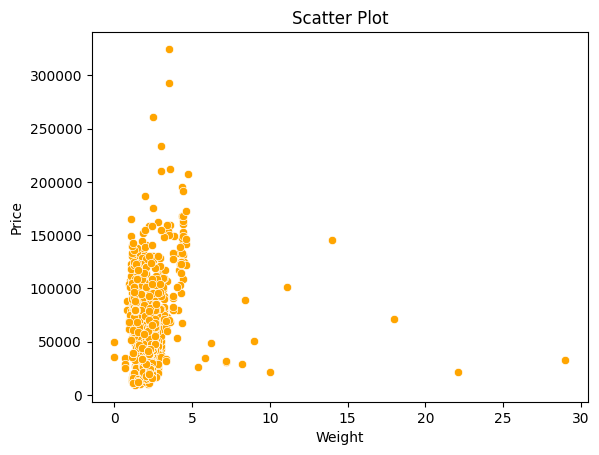

In [248]:
sns.scatterplot(x='Weight',y='Price',data =a,color = 'orange')
plt.title('Scatter Plot')
plt.show()

Almost, the large amount of laptop weight range into 3-4Kg .